In [138]:
#split the data into train,val,test in ratio 6:2:2

# import splitfolders

# splitfolders.ratio(
#     input="D:/salmon/SalmonScan/Augmented",
#     output="salmon_dataset",
#     seed=1337,
#     ratio=(.6, .2, .2)
# )

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

train_path = r"\salmon\salmon_dataset_split\train"

training_set = image_dataset_from_directory(
    train_path,
    labels="inferred", #same class as in folders
    label_mode="binary", #2 class
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 724 files belonging to 2 classes.


In [4]:
val_path = r"\salmon\salmon_dataset_split\val"
val_set = image_dataset_from_directory(
    val_path,
    labels="inferred", #same class as in folders
    label_mode="binary", #2 class
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 241 files belonging to 2 classes.


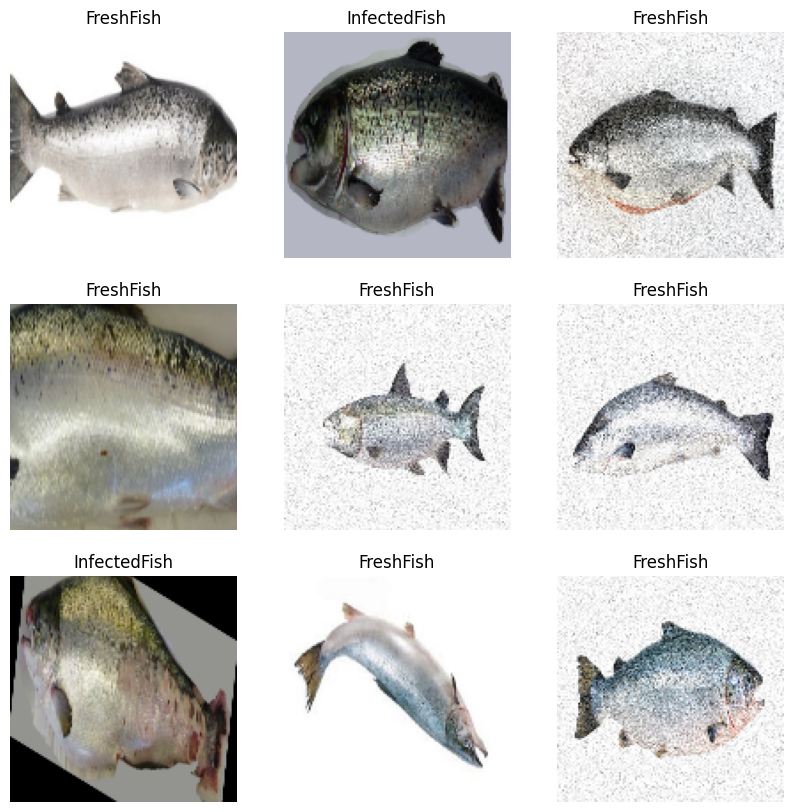

In [5]:
#checking some images from the training set
class_names = training_set.class_names

plt.figure(figsize=(10, 10))
for images, labels in training_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])]) 
    plt.axis("off")

Model Building


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [59]:
model = Sequential()

In [ ]:
#convolution layers
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation ='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation ='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2)) 

In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation ='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation ='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))  

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation ='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation ='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2)) 

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation ='relu'))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation ='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2)) 

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation ='relu'))
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation ='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2)) 

In [65]:
#flatting operation
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500,activation='relu')) #dense layer

In [67]:
#ouput layer
model.add(Dense(units=1,activation='sigmoid'))

In [68]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_33 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 64, 64, 64)        36928     
                                                      

Model Training


In [70]:
train_history=model.fit(x=training_set,validation_data=val_set,epochs=10)

Epoch 1/10


23/23 [==============================] - 3s 100ms/step - loss: 4.3488 - accuracy: 0.5815 - val_loss: 0.6918 - val_accuracy: 0.5519
Epoch 2/10
23/23 [==============================] - 2s 95ms/step - loss: 0.7184 - accuracy: 0.5373 - val_loss: 0.6820 - val_accuracy: 0.6224
Epoch 3/10
23/23 [==============================] - 2s 95ms/step - loss: 0.6807 - accuracy: 0.6064 - val_loss: 0.6866 - val_accuracy: 0.6224
Epoch 4/10
23/23 [==============================] - 2s 95ms/step - loss: 0.6956 - accuracy: 0.5580 - val_loss: 0.6836 - val_accuracy: 0.6224
Epoch 5/10
23/23 [==============================] - 2s 96ms/step - loss: 0.6716 - accuracy: 0.6215 - val_loss: 0.6839 - val_accuracy: 0.6017
Epoch 6/10
23/23 [==============================] - 2s 95ms/step - loss: 0.6769 - accuracy: 0.6105 - val_loss: 0.6848 - val_accuracy: 0.6556
Epoch 7/10
23/23 [==============================] - 2s 95ms/step - loss: 0.6648 - accuracy: 0.6064 - val_loss: 0.6872 - val_accuracy: 0.6266
Epoch 8/10
23/23 [=====

In [71]:
#model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

23/23 [==============================] - 1s 27ms/step - loss: 0.6659 - accuracy: 0.5953


In [72]:
print(train_loss,train_acc)

0.6658996939659119 0.5953038930892944


In [73]:
#model evaluation on val
val_loss,val_acc = model.evaluate(val_set)

8/8 [==============================] - 0s 20ms/step - loss: 0.6675 - accuracy: 0.6266


In [74]:
print(val_loss,val_acc)

0.6675202250480652 0.6265560388565063


In [75]:
# #saving the model
# model.save("s_trained_model.keras")

Visualizing the Model


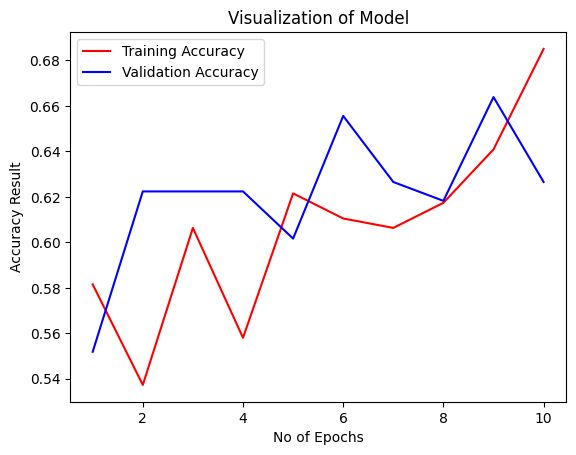

In [76]:
#visualizing our model
epochs = [i for i in range(1,11)]
plt.plot(epochs,train_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,train_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Model")
plt.legend()
plt.show()

In [163]:
class_names = val_set.class_names
class_names

['FreshFish', 'InfectedFish']

In [164]:
test_set = image_dataset_from_directory(
    val_path,
    labels="inferred", #same class as in folders
    label_mode="binary", #2 class
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False, 
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 241 files belonging to 2 classes.


In [165]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

8/8 [==============================] - 1s 54ms/step


(array([[1.47957755e-02],
        [3.83396214e-03],
        [4.04105961e-01],
        [3.95103186e-01],
        [9.94941220e-03],
        [6.98658228e-02],
        [2.51094550e-02],
        [5.43866074e-03],
        [5.18807385e-04],
        [2.13527083e-02],
        [8.73263404e-02],
        [1.24096079e-03],
        [5.19160356e-04],
        [2.42284853e-02],
        [4.98197880e-03],
        [1.03998696e-02],
        [1.87221239e-03],
        [7.60068139e-03],
        [5.96881285e-03],
        [2.11345665e-02],
        [8.71521592e-01],
        [3.83365713e-02],
        [5.81305241e-03],
        [7.32975006e-02],
        [1.30645931e-03],
        [1.02506881e-03],
        [2.55816337e-03],
        [1.99326202e-02],
        [2.23231420e-01],
        [5.93923591e-03],
        [7.08426116e-04],
        [1.26632443e-02],
        [4.63743089e-03],
        [1.44604954e-03],
        [4.70601866e-04],
        [4.86402690e-01],
        [5.16266155e-04],
        [1.00260985e-03],
        [2.7

In [166]:
predict_categories = (y_pred > 0.5).astype("int32").flatten()

In [167]:
predict_categories

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [168]:
true_categories = tf.concat([y for x, y in test_set], axis=0).numpy().flatten()


In [169]:
true_categories

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [170]:
from sklearn.metrics import classification_report,confusion_matrix

In [171]:
print(classification_report(true_categories, predict_categories, target_names=['Healthy', 'Diseased']))

              precision    recall  f1-score   support

     Healthy       0.81      0.92      0.86        91
    Diseased       0.95      0.87      0.91       150

    accuracy                           0.89       241
   macro avg       0.88      0.89      0.88       241
weighted avg       0.90      0.89      0.89       241



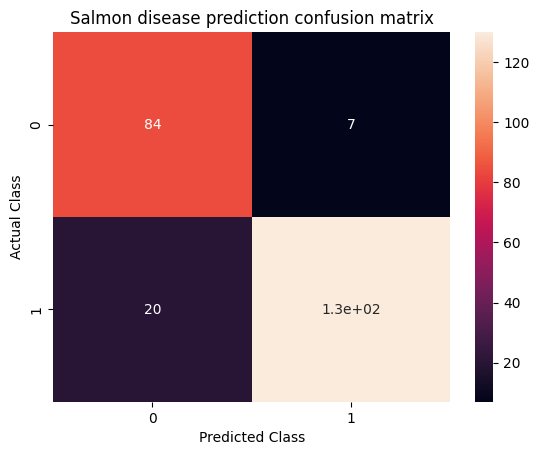

In [174]:
mat = confusion_matrix(true_categories,predict_categories)
plt.figure()
sns.heatmap(mat,annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Salmon disease prediction confusion matrix")
plt.show()
